little notebook to solve the time-independent schrödinger equation (tise) for the isochrone potential, 
to find the possible eigenvalues of the isochrone potential.

In [56]:
import numpy as np

# potential
b = 1 # in kiloparsecs
GM = 1 # 1e10 solar masses times G
h_bar = 1 # hbar = 1


def isochrone_potential(r):
    return -GM/(b+np.sqrt(r**2+b**2))

In [57]:
# search_parameters
n = 1000
dr = 1e-1 # in parsecs

# define the matrices you want to build your hamiltonian matrix

# derivative matrix

def derivative_matrix(n, dr):
    # n is the number of dimensions, dr is the r increment between the points
    D = np.zeros((n,n))

    for i in range(n):
        if i == 0:
            D[i,i] = -1
            D[i, i+1] = 1
        if i > 0 and i < n - 1:
            D[i,i] = 0
            D[i+1,i] = 5
            D[i-1,i] = -.5
        if i == n-1:
            D[i,i] = .5
            D[i-1,i] = -.5
    return D/dr

def multiply_by_r_power_matrix(n, power, dr):
    R = np.zeros((n,n))
    for i in range(n):
        R[i,i] = (i+1)*dr**power
    return R

def isochrone_matrix(n):
    R = np.zeros((n,n))
    for i in range(n):
        R[i,i] = isochrone_potential((i+1)*dr)
    return R

d_matrix = derivative_matrix(n, dr)
r_matrix_2 = multiply_by_r_power_matrix(n, 2, dr)
r_matrix_neg2 = multiply_by_r_power_matrix(n, -2, dr)
isochrone_matrix = isochrone_matrix(n)

hamiltonian_matrix = -h_bar**2/2*np.matmul(np.matmul(r_matrix_neg2, d_matrix), np.matmul(r_matrix_2, d_matrix)) + isochrone_matrix


In [58]:
w, v = np.linalg.eigh(hamiltonian_matrix)
w

array([-2.15506378e+09, -2.14929521e+09, -2.07637178e+09, -2.07077130e+09,
       -2.01322981e+09, -2.00776406e+09, -1.95837949e+09, -1.95303073e+09,
       -1.90901779e+09, -1.90377429e+09, -1.86368674e+09, -1.85853990e+09,
       -1.82150446e+09, -1.81644761e+09, -1.78188552e+09, -1.77691323e+09,
       -1.74441571e+09, -1.73952345e+09, -1.70878807e+09, -1.70397196e+09,
       -1.67476690e+09, -1.67002357e+09, -1.64216611e+09, -1.63749260e+09,
       -1.61083545e+09, -1.60622911e+09, -1.58065126e+09, -1.57610970e+09,
       -1.55151021e+09, -1.54703129e+09, -1.52332479e+09, -1.51890652e+09,
       -1.49602000e+09, -1.49166058e+09, -1.46953094e+09, -1.46522870e+09,
       -1.44380095e+09, -1.43955433e+09, -1.41878017e+09, -1.41458774e+09,
       -1.39442442e+09, -1.39028482e+09, -1.37069430e+09, -1.36660626e+09,
       -1.34755448e+09, -1.34351682e+09, -1.32497312e+09, -1.32098471e+09,
       -1.30292139e+09, -1.29898117e+09, -1.28137307e+09, -1.27748002e+09,
       -1.26030421e+09, -

Text(0, 0.5, 'eigenvalue')

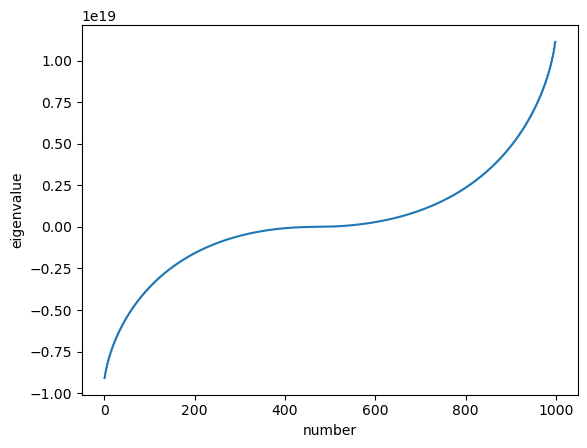

In [ ]:
import matplotlib.pyplot as plt

# converting units
E_conversion = (2*1e40*6.67*1e-11)**(1)*(3.09*1e19)**(-2) # conversion to joules per kg
energy_per_mass = E_conversion*w

plt.plot(conv_w)
plt.xlabel('number')
plt.ylabel('eigenvalue')

(0.0, -2250000000.0)

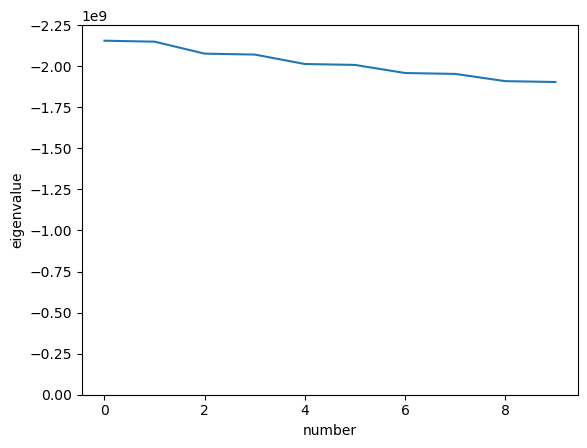

In [66]:
# zoom in at the first eigenvalues
plt.plot(w[:10])
plt.xlabel('number')
plt.ylabel('eigenvalue')
plt.ylim(0, -2.25e9)